In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\aksha\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [4]:
df=pd.read_csv("C:\AI Program\Position Salary .csv")

In [5]:
df.shape

(10, 3)

In [6]:
df.head()

Position  Level  Salary
0   Busienss Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4  120000
4    Country Manager      5  140000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [8]:
x=df.iloc[:,1:2].values
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [9]:
y=df.iloc[:,2].values
print(y)

[ 45000  50000  60000 120000 140000 130000 100000  90000  95000  85000]


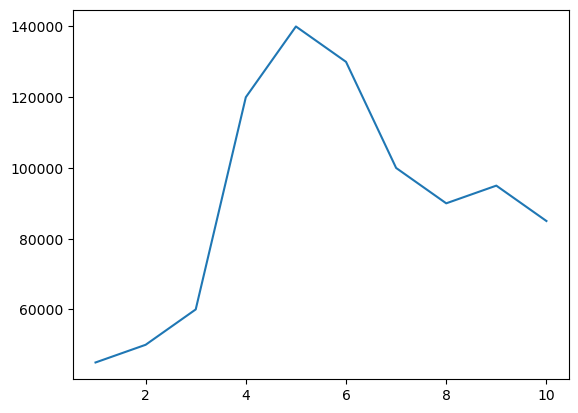

In [10]:
plt.plot(x,y)
plt.show()

In [11]:
# Random Forest Classifier

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [13]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [14]:
y_pred = rf.predict(x_test)

In [15]:
print(y_pred)

[66300. 89250.]


In [16]:

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [17]:
print('R Squared', metrics.r2_score(y_test,y_pred))

R Squared 0.8812204081632653


In [18]:
print('Mean Squared Error=', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error= 36376250.0


In [19]:
print('Mean Absolute Error=', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error= 6025.0


In [20]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error=', rmse)

Root Mean Squared Error= 6031.272668351183


In [24]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 278.7/278.7 kB 818.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=9f8133f2ac7fa454bb5dc6eea9f70ba9239f037e7af79429d232432e330c1cb6
  Stored in directory: c:\users\aksha\appdata\local\pip\cache\wheels\5c\94\1f\953aa60af58ef512e5256e538ff0772c340229e5996ac51fd6
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [25]:
import six
import sys
sys.modules ['sklearn.externals.six']=six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
features=x.column
features

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=features,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)